In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). 
#The multinomial distribution normally requires integer feature counts. 
#However, in practice, fractional counts such as tf-idf may also work.
from sklearn import preprocessing 
from sklearn.model_selection import KFold
#Provides train/test indices to split data in train/test sets. 
#Split dataset into k consecutive folds (without shuffling by default).
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import warnings



# New Section

In [ ]:
df=pd.read_csv("/content/diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Glucose']=df['Glucose'].replace(0,np.nan)#replace None number value with zero
df['BloodPressure']=df['BloodPressure'].replace(0,np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)
df['BMI']=df['BMI'].replace(0,np.nan)
df['Insulin']=df['Insulin'].replace(0,np.nan)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
df.fillna(df.median(), inplace=True)#fill null with median is a good approximate 

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

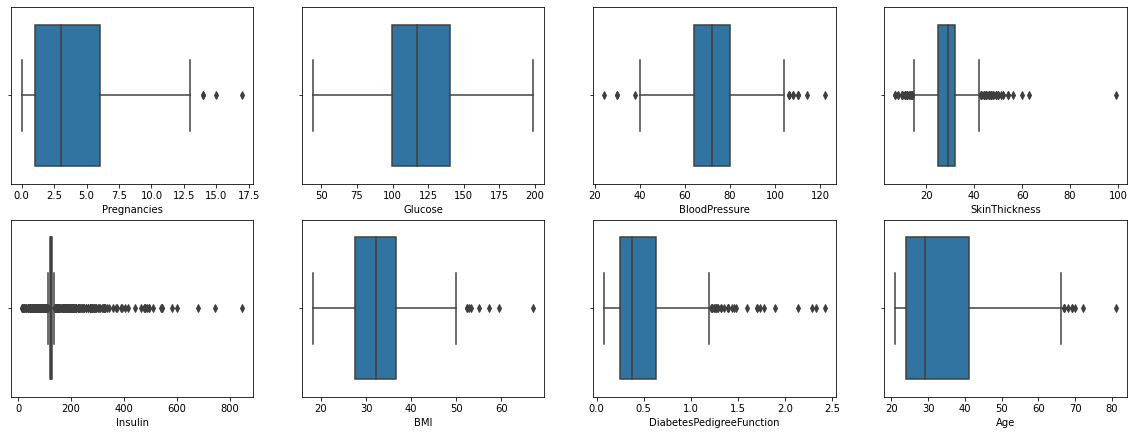

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sb.boxplot(df['Pregnancies'])
plt.subplot(4,4,2)
sb.boxplot(df['Glucose'])
plt.subplot(4,4,3)
sb.boxplot(df['BloodPressure'])
plt.subplot(4,4,4)
sb.boxplot(df['SkinThickness'])
plt.subplot(4,4,5)
sb.boxplot(df['Insulin'])
plt.subplot(4,4,6)
sb.boxplot(df['BMI'])
plt.subplot(4,4,7)
sb.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(4,4,8)
sb.boxplot(df['Age'])
plt.show()

trime the outlier data 

In [ ]:
df["Pregnancies"]=df["Pregnancies"].clip(lower=df["Pregnancies"].quantile(0.05),upper=df["Pregnancies"].quantile(0.95))
print(df["Pregnancies"])
df["BloodPressure"]=df["BloodPressure"].clip(lower=df["BloodPressure"].quantile(0.05),upper=df["BloodPressure"].quantile(0.95))
df["SkinThickness"]=df["SkinThickness"].clip(lower=df["SkinThickness"].quantile(0.05),upper=df["SkinThickness"].quantile(0.95))
df["Insulin"]=df["Insulin"].clip(lower=df["Insulin"].quantile(0.05),upper=df["Insulin"].quantile(0.95))
df["BMI"]=df["BMI"].clip(lower=df["BMI"].quantile(0.05),upper=df["BMI"].quantile(0.95))
df["DiabetesPedigreeFunction"]=df["DiabetesPedigreeFunction"].clip(lower=df["DiabetesPedigreeFunction"].quantile(0.05),upper=df["DiabetesPedigreeFunction"].quantile(0.95))
df["Age"]=df["Age"].clip(lower=df["Age"].quantile(0.05),upper=df["Age"].quantile(0.95))

0       6.0
1       1.0
2       8.0
3       1.0
4       0.0
       ... 
763    10.0
764     2.0
765     5.0
766     1.0
767     1.0
Name: Pregnancies, Length: 768, dtype: float64


Plot DATA after remove null value and outlier 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

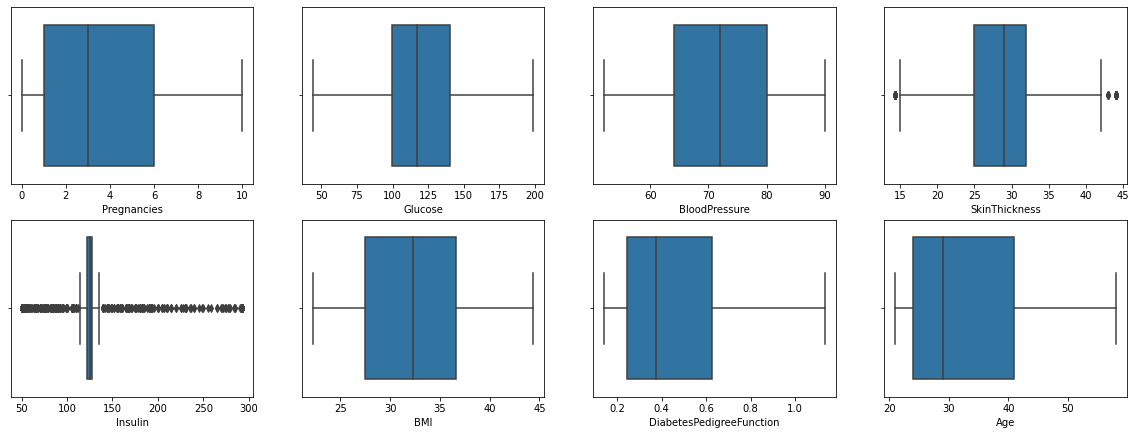

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sb.boxplot(df['Pregnancies'])
plt.subplot(4,4,2)
sb.boxplot(df['Glucose'])
plt.subplot(4,4,3)
sb.boxplot(df['BloodPressure'])
plt.subplot(4,4,4)
sb.boxplot(df['SkinThickness'])
plt.subplot(4,4,5)
sb.boxplot(df['Insulin'])
plt.subplot(4,4,6)
sb.boxplot(df['BMI'])
plt.subplot(4,4,7)
sb.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(4,4,8)
sb.boxplot(df['Age'])
plt.show()

In [ ]:
df['SkinThickness']=df['SkinThickness'].clip(lower=df['SkinThickness'].quantile(0.07),upper=df['SkinThickness'].quantile(0.93))
df['Insulin']=df['Insulin'].clip(lower=df['Insulin'].quantile(0.25),upper=df['Insulin'].quantile(0.75))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


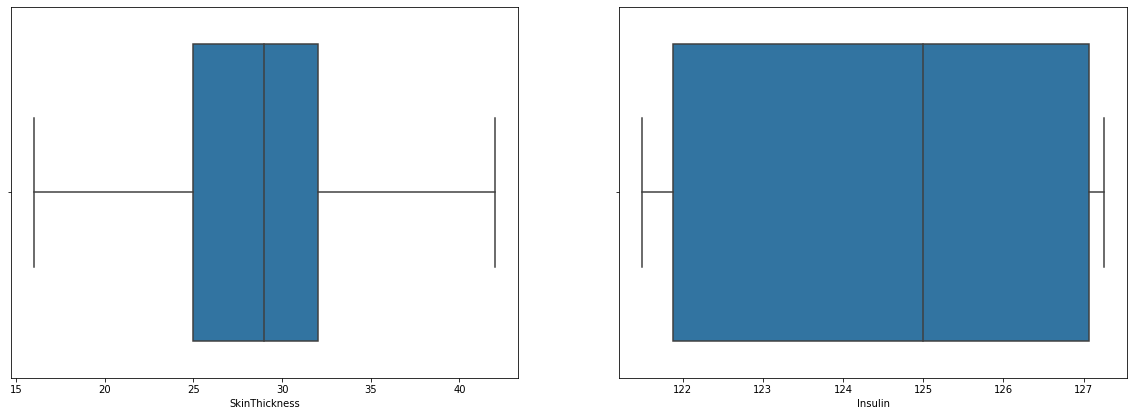

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sb.boxplot(df['SkinThickness'])
plt.subplot(2,2,2)
sb.boxplot(df['Insulin'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


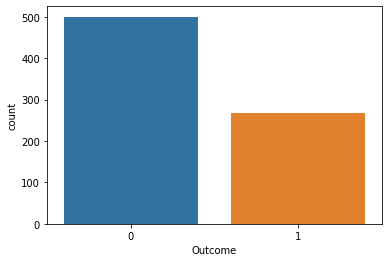

In [ ]:
sb.countplot(df['Outcome']) #Show the counts of observations in each categorical bin using bars.
plt.show()

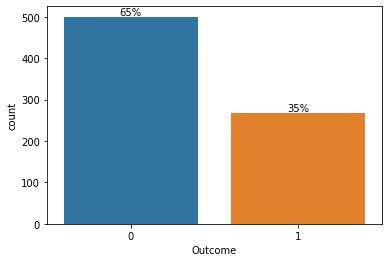

In [ ]:
total =float(len(df))
ax=sb.countplot(x='Outcome',data=df)
for i in ax.patches:
    height=i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 3
           ,'{0:.0%}'.format(height/total),ha="center")
    
#The positional parameters (x and y) determining the position (just outside the bar) at which we should print this label. 
#Every bar (and its corresponding background area


<ipython-input-27-d04dc5d7cb55>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sb.heatmap(corelation_df,mask=np.zeros_like(corelation_df,dtype=np.bool),


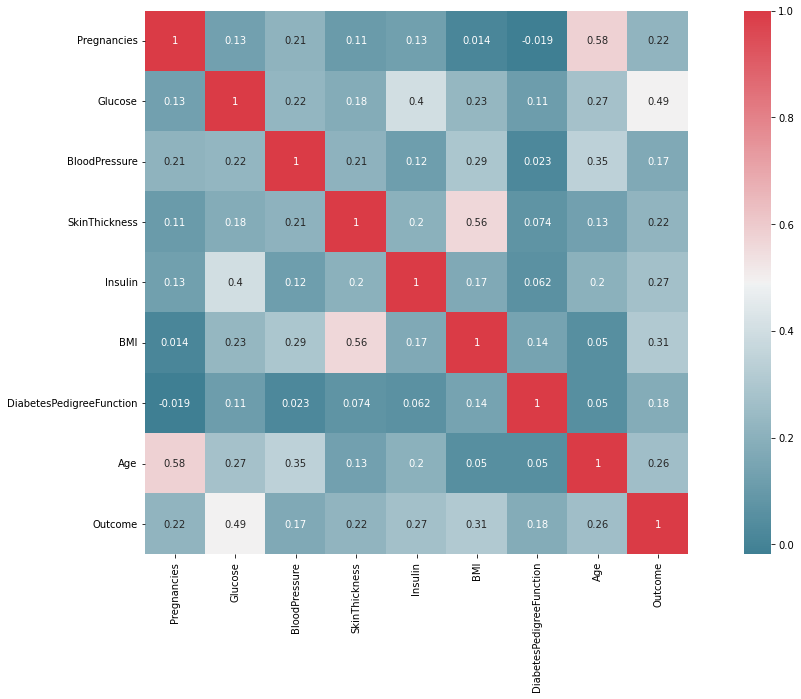

In [ ]:
f,ax=plt.subplots(figsize=(20,10))
corelation_df=df.corr('pearson') #zaribe hambastegi pearson
sb.heatmap(corelation_df,mask=np.zeros_like(corelation_df,dtype=np.bool),
           cmap=sb.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)

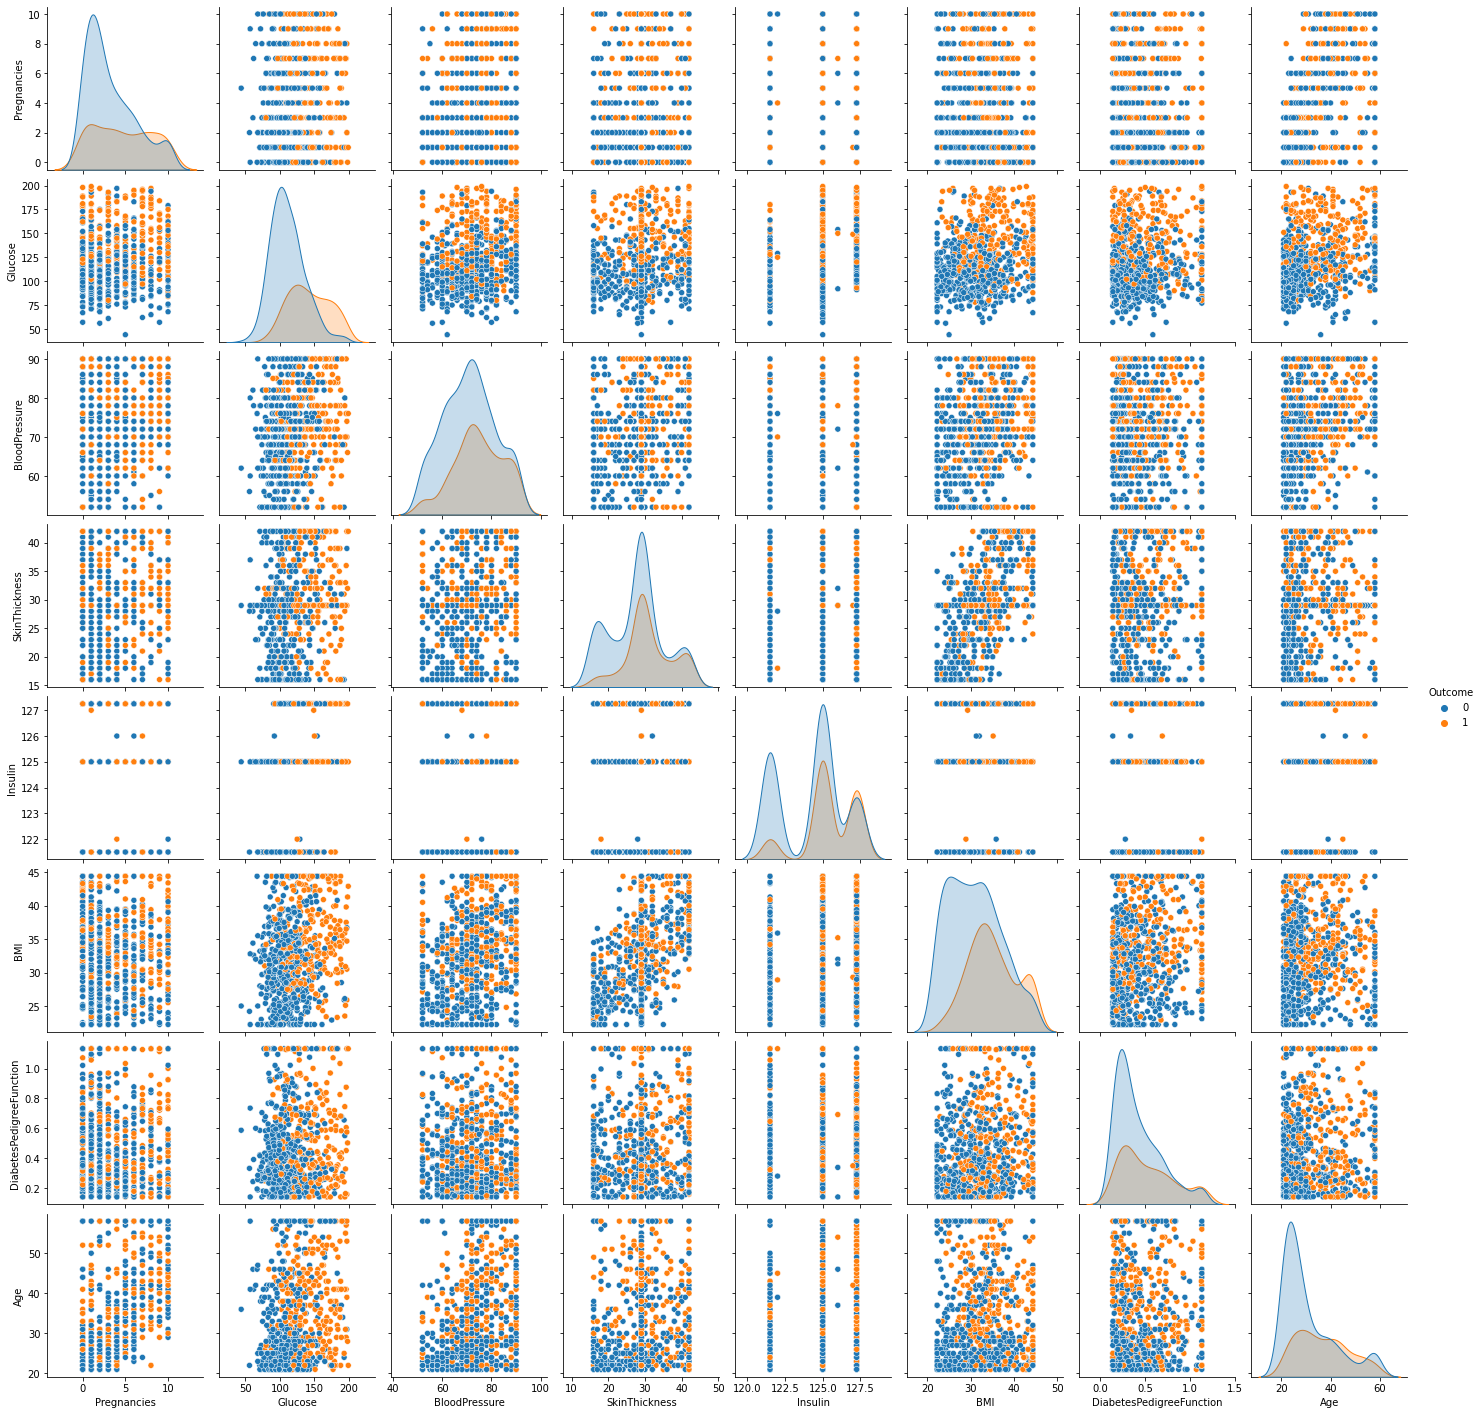

In [ ]:
sb.pairplot(df,hue="Outcome",diag_kind="kde")

now devide your DS into feature and label 

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.00,33.6,0.62700,50.0,1
1,1.0,85.0,66.0,29.0,125.00,26.6,0.35100,31.0,0
2,8.0,183.0,64.0,29.0,125.00,23.3,0.67200,32.0,1
3,1.0,89.0,66.0,23.0,121.50,28.1,0.16700,21.0,0
4,0.0,137.0,52.0,35.0,127.25,43.1,1.13285,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,42.0,127.25,32.9,0.17100,58.0,0
764,2.0,122.0,70.0,27.0,125.00,36.8,0.34000,27.0,0
765,5.0,121.0,72.0,23.0,121.50,26.2,0.24500,30.0,0
766,1.0,126.0,60.0,29.0,125.00,30.1,0.34900,47.0,1


seprate your feature from label 
feature vector=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
label=outcome


In [ ]:
x = pd.DataFrame(df,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values
y = df["Outcome"].values.reshape(-1,1) # Target variable
print('Feature vector = %s'%x,"\n Label = %s"%y)

Feature vector = [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 
 Label = [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [

Devide your dataset into train set and test set 

**random_state can be int or non it said every time we run the code whether regenerate test and train or not **

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring. An example of logistic regression could be applying machine learning to determine if a person is likely to be infected with COVID-19 or not. Since we have two possible outcomes to this question - yes they are infected, or no they are not infected - this is called binary classification.
**The three types of logistic regression**


1.   Binary logistic regression - When we have two possible outcomes, like our original example of whether a person is likely to be infected with COVID-19 or not.
2.   Multinomial logistic regression - When we have multiple outcomes, say if we build out our original example to predict whether someone may have the flu, an allergy, a cold, or COVID-19.
3.   Ordinal logistic regression - When the outcome is ordered, like if we build out our original example to also help determine the severity of a COVID-19 infection, sorting it into mild, moderate, and severe cases.

Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.





In [ ]:
model=LogisticRegression(solver='liblinear')

**K-Folds cross-validator**

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

Read more in the User Guide.

In [ ]:
Kfold=KFold(10)

In [ ]:
result=cross_val_score(model,x,y.ravel(),cv=Kfold)

In [ ]:
result

array([0.71428571, 0.81818182, 0.72727273, 0.66233766, 0.77922078,
       0.79220779, 0.83116883, 0.81818182, 0.73684211, 0.81578947])

In [ ]:
model.fit(x_train,y_train.ravel())

LogisticRegression(solver='liblinear')

In [ ]:
y_hat=model.predict(x_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_hat))

Accuracy:  0.7987012987012987


now draw the plt for Receiver operating characteristic

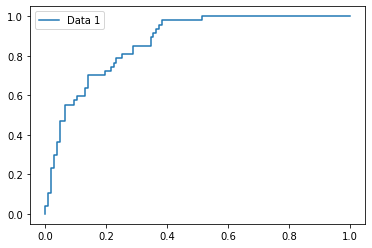

In [ ]:
Y_hat_prob=model.predict_proba(x_test)[::,1]
False_Positive_rate,True_Positive_rate,_ =metrics.roc_curve(y_test,Y_hat_prob)
plt.plot(False_Positive_rate,True_Positive_rate,label='Data 1')
plt.legend(loc=2)
plt.show()

In [ ]:
model.predict_proba(x)

array([[0.25298425, 0.74701575],
       [0.95286671, 0.04713329],
       [0.23203625, 0.76796375],
       ...,
       [0.80152289, 0.19847711],
       [0.64360594, 0.35639406],
       [0.93432734, 0.06567266]])

In [ ]:
model.predict(x)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [ ]:
model.score(x,y)

0.765625

What the Confusion Matrix Measures?

It measures the quality of predictions from a classification model by looking at how many predictions are True and how many are False.

In [ ]:
confusion_matrix(y,model.predict(x))

array([[436,  64],
       [116, 152]])

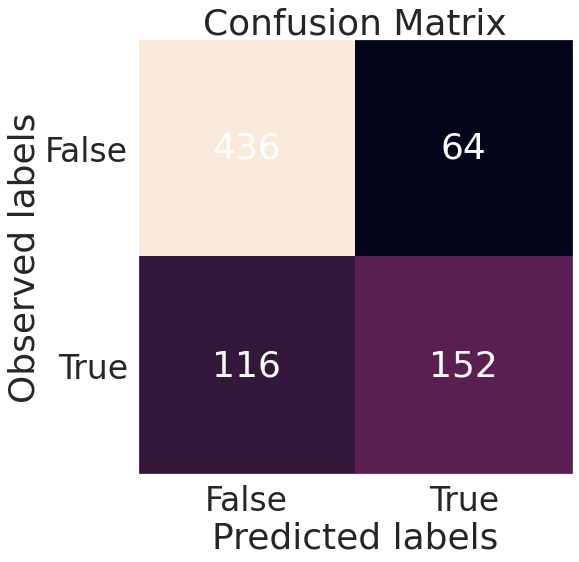

In [ ]:
Confusion_matrix=confusion_matrix(y,model.predict(x))
fig , ax = plt.subplots(figsize=(8,8))
ax.imshow(Confusion_matrix)
ax.grid(False)
ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.xaxis.set(ticks=(0, 1), ticklabels=('False', 'True'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('False', 'True'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       500
           1       0.70      0.57      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768

